In [1]:
#The article related to this Notebook is here:
#https://www.linkedin.com/pulse/analysing-life-insurance-investment-opportunities-python-debeila/

#Other Sources:
#https://github.com/actuarialopensource/pymort
#https://mort.soa.org/
#https://www.lifeexpectancy.org/lifetable.shtml

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import numpy_financial as npf

In [4]:
# Define the parameters
current_age         = 82 
policy_maturity_age = 100 
purchase_price      = -380476
annual_premium      = -95119 
death_benefit       = 2000000  

In [5]:
# Define a custom formatting function to remove extra spacing when printing the arrays:
def custom_float_format(x):
    return f"{x:.0f}"

# Set the display options to remove extra spacing
np.set_printoptions(threshold=np.inf, formatter={'float_kind': custom_float_format})

In [6]:
#Death Benefit Matrix:
dimension = policy_maturity_age - current_age + 1
DB_matrix = np.eye((dimension))
DB_matrix[0, 0] = 0
DB_matrix *= death_benefit

DB_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000000, 0, 0, 0, 0, 0]

In [7]:
#Purchase Price Matrix:
PP_matrix = np.zeros((dimension,dimension))
for i in range(dimension):
    PP_matrix[i, :1] = purchase_price

PP_matrix

array([[-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [-380476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
#Premium Matrix:
Prem_matrix = np.zeros((dimension,dimension))
for i in range(dimension):
    for j in range(1, i):
        Prem_matrix[i][j] = annual_premium

formatted_matrix = np.array2string(Prem_matrix, formatter={'float_kind': custom_float_format}, max_line_width=np.inf)
print(formatted_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 0 0 0 0 0 0]
 [0 -95119 -95119 -95119 -95119 -951

In [9]:
#Cash _Flow Matrix
CF_matrix = DB_matrix + PP_matrix + Prem_matrix
formatted_matrix2 = np.array2string(CF_matrix, formatter={'float_kind': custom_float_format}, max_line_width=np.inf)
print(formatted_matrix2)

[[-380476 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 2000000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 2000000 0 0 0 0 0 0 0]
 [-380476 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 -95119 2000000 

In [10]:
# Calculate IRR for each set of cash flows
irrs = []
durations = []
for row in CF_matrix:
    # Filter out zero cash flows and ensure the first cash flow is negative (investment)
    cash_flows = row[row != 0]
    
    # Calculate IRR
    irr = npf.irr(cash_flows)
    irrs.append(irr)
    
    # Calculate Duration
    duration = len(cash_flows) - 1
    durations.append(duration)

# Create a Pandas DataFrame
data = {
    "Duration (t)"         : durations,
    "Age last birthday (x)": [year for year in range(current_age, current_age + len(irrs))],
    "IRR"                  : [f"{irr:.2%}" for irr in irrs],
}
df = pd.DataFrame(data)

# Transpose the DataFrame and display it
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Duration (t),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Age last birthday (x),82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
IRR,nan%,425.66%,117.11%,61.37%,39.16%,27.40%,20.18%,15.32%,11.85%,9.25%,7.24%,5.65%,4.37%,3.31%,2.42%,1.68%,1.04%,0.49%,0.01%


In [12]:
#Import pymort Library for accessing the mortality table from SOA website
from pymort import MortXML

In [13]:
# Table 3276 is ‘2015 VBT Unismoke Female ALB’
xml = MortXML(3276)

In [14]:
# Data from Panda's to Numpy
ultimate = xml.Tables[1].Values

# Rename the 'vals' column to 'm(x)'
ultimate = ultimate.rename(columns={'vals': 'm(x)'})

# Set the index name to 'Age (x)'
ultimate.index.name = 'Age (x)'

# Check the updated column names
print(ultimate.columns)

Index(['m(x)'], dtype='object')


In [15]:
# Assuming l(0) = 100,000
l_x = [100000] 

# Calculate l(x+1) for each age and append it to the 'ultimate' DataFrame
for i in range(len(ultimate) - 1):
    m_x = ultimate.loc[i, 'm(x)']
    l_x_iplus1 = l_x[i] * np.exp(-m_x)
    l_x.append(l_x_iplus1)
    ultimate.loc[i, 'l(x)'] = l_x_iplus1

# Set the 'l(x)' value for the last row (age 121)
ultimate.loc[len(ultimate) - 1, 'l(x)'] = 0  # Assuming no one is alive at age 121

# Calculate d(x) = l(x) - l(x+1) and add it to the 'ultimate' DataFrame
ultimate['d(x)'] = ultimate['l(x)'] - ultimate['l(x)'].shift(-1)

# Fill the NaN value in d(x) with the last value of l(x)
ultimate.at[len(ultimate) - 1, 'd(x)'] = l_x[-1]

# Calculate q(x) = d(x) / l(x) and add it to the 'ultimate' DataFrame
ultimate['q(x)'] = ultimate['d(x)'] / ultimate['l(x)']

# Calculate p(x) = 1 - q(x) and add it to the 'ultimate' DataFrame
ultimate['p(x)'] = 1 - ultimate['q(x)']

# Calculate L(x) = l(x+1) + 0.5 * d(x) and add it to the 'ultimate' DataFrame
#ultimate['L(x)'] = ultimate['l(x)'].shift(-1) + 0.5 * ultimate['d(x)']

# Calculate T(x) as the sum of values in the 'L(x)' column from age x to the last row
#def calculate_T_x(start_age):
    #return ultimate.loc[start_age:, 'L(x)'].sum()

# Add a new column 'T(x)' to the 'ultimate' DataFrame
#ultimate['T(x)'] = [calculate_T_x(age) for age in range(ultimate.index[-1] + 1)]

# Calculate e(x) = T(x) / l(x) and add it to the 'ultimate' DataFrame
#ultimate['e(x)'] = ultimate['T(x)'] / ultimate['l(x)']

# Display the updated DataFrame
ultimate

,m(x),l(x),d(x),q(x),p(x)
Age (x),,,,,
0,0.00022,99978.002420,11.996640,0.000120,0.999880
1,0.00012,99966.005779,7.996961,0.000080,0.999920
2,0.00008,99958.008819,6.996816,0.000070,0.999930
3,0.00007,99951.012003,6.996326,0.000070,0.999930
4,0.00007,99944.015677,6.995836,0.000070,0.999930
...,...,...,...,...,...
116,0.50000,3.139726,1.235386,0.393469,0.606531
117,0.50000,1.904340,0.749299,0.393469,0.606531
118,0.50000,1.155041,0.454473,0.393469,0.606531


In [17]:
# Define the starting age
start_age = current_age

# Create 'ult_new' by selecting rows from 'ultimate' for ages greater than or equal to 'start_age' up to age 102
ult_new = ultimate.loc[start_age:102].copy()

# Reset the index of 'ult_new'
ult_new.reset_index(inplace=True)

#Add column with duration of policy
ult_new['Duration (t)'] = ult_new['Age (x)'] - 82

# Create a new column in 'ult_new' using 'current_age' for column name
ult_new[f'p({current_age}, {current_age}+t)'] = ult_new.apply(lambda row: row['l(x)'] / ult_new.loc[0, 'l(x)'], axis=1)

# Create a new column 'p(82, 82+t-1)*q(82+t-1,1)' and initialize it with 0.0 (float)
ult_new[f'p({current_age}, {current_age}+t-1)*q({current_age}+t-1,1)'] = 0

for i in range(1, len(ult_new)):
    prev_p = ult_new.at[i - 1, f'p({current_age}, {current_age}+t)']
    prev_q = ult_new.at[i - 1, 'q(x)'] 
    ult_new.at[i, f'p({current_age}, {current_age}+t-1)*q({current_age}+t-1,1)'] = prev_p * prev_q

# Display the updated 'ult_new' DataFrame
ult_new


,Age (x),m(x),l(x),d(x),q(x),p(x),Duration (t),"p(82, 82+t)","p(82, 82+t-1)*q(82+t-1,1)"
0,82,0.04666,62900.253002,3226.624690,0.051297,0.948703,0,1.000000,0.000000
1,83,0.05266,59673.628312,3448.702071,0.057793,0.942207,1,0.948703,0.051297
2,84,0.05953,56224.926241,3663.622116,0.065160,0.934840,2,0.893874,0.054828
3,85,0.06738,52561.304125,3852.481034,0.073295,0.926705,3,0.835629,0.058245
4,86,0.07612,48708.823091,3998.689152,0.082094,0.917906,4,0.774382,0.061247
5,87,0.08566,44710.133940,4097.053786,0.091636,0.908364,5,0.710810,0.063572
6,88,0.09611,40613.080153,4137.967388,0.101888,0.898112,6,0.645674,0.065136
7,89,0.10746,36475.112766,4109.705158,0.112671,0.887329,7,0.579888,0.065786
8,90,0.11954,32365.407607,4010.781762,0.123922,0.876078,8,0.514551,0.065337
9,91,0.13230,28354.625845,3848.816979,0.135739,0.864261,9,0.450787,0.063764


In [18]:
# Merge 'df' and 'ult_new' on 'Duration (t)' using a left join
merged_df = df.merge(ult_new[['Duration (t)', f'p({current_age}, {current_age}+t-1)*q({current_age}+t-1,1)']], on='Duration (t)', how='left')

# Rename the newly added column if needed
merged_df.rename(columns={f'p({current_age}, {current_age}+t-1)*q({current_age}+t-1,1)': 'Probability'}, inplace=True)

# Format IRR and Probability columns to be in percentage format with 1 decimal place
merged_df['IRR'] = merged_df['IRR'].apply(lambda x: f'{float(x.replace("%", "")):.1f}%')
merged_df['Probability'] = merged_df['Probability'].apply(lambda x: f'{x:.1%}')

# Display the updated DataFrame
merged_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Duration (t),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Age last birthday (x),82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
IRR,nan%,425.7%,117.1%,61.4%,39.2%,27.4%,20.2%,15.3%,11.8%,9.2%,7.2%,5.7%,4.4%,3.3%,2.4%,1.7%,1.0%,0.5%,0.0%
Probability,0.0%,5.1%,5.5%,5.8%,6.1%,6.4%,6.5%,6.6%,6.5%,6.4%,6.1%,5.8%,5.3%,4.8%,4.4%,3.8%,3.3%,2.8%,2.3%


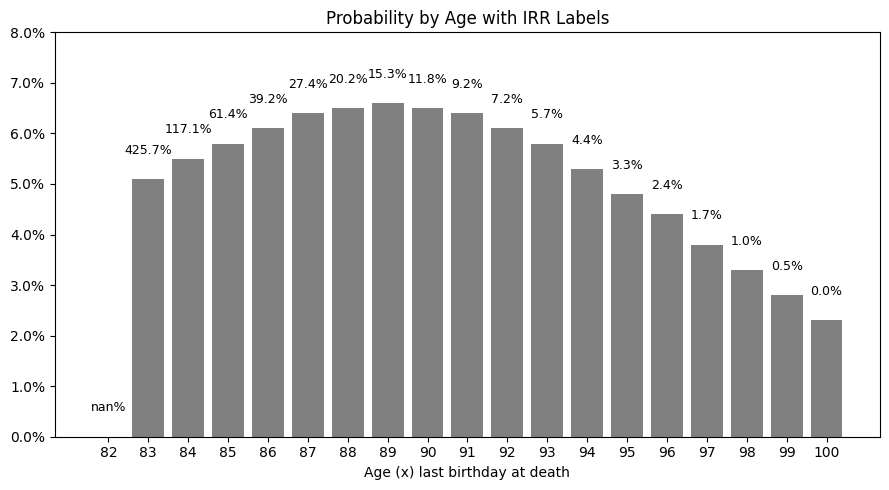

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Extract the age, probability, and IRR columns from merged_df
ages = merged_df['Age last birthday (x)']
probabilities = merged_df['Probability']

# Convert the probability column to numerical values
probabilities = probabilities.str.rstrip('%').astype(float) / 100

# Create a bar chart with black bars
plt.figure(figsize=(9, 5))
bars = plt.bar(ages, probabilities, color='grey')

# Extract the IRR values as numerical values
irr_values = merged_df['IRR'].str.rstrip('%').astype(float)

# Define a custom function for formatting y-axis labels as percentages with one decimal place
def percent_formatter(x, pos):
    return f'{x:.1%}'

# Create a FuncFormatter object for the custom formatting
percent_format = FuncFormatter(percent_formatter)

# Apply the custom formatting to the y-axis
plt.gca().yaxis.set_major_formatter(percent_format)

# Set the upper limit of the y-axis to 10%
plt.ylim(0, 0.08)

# Set x-axis ticks to integer values
plt.xticks(range(int(min(ages)), int(max(ages)) + 1))

# Add labels to the bars with orange text
for bar, irr_value in zip(bars, irr_values):
    label_color = 'black'
    label_fontsize = 9  
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f'{irr_value:.1f}%',
        ha='center',
        color=label_color,
        fontsize=label_fontsize,  # Set font size
    )

# Add title and adjust layout
plt.xlabel('Age (x) last birthday at death')
plt.title('Probability by Age with IRR Labels')
plt.tight_layout()

# Show the plot
plt.show()